### Access swot data (small lake) through earthdata.
1. SWOT_L2_HR_Raster
2. SWOT_L2_HR_PIXC


In [1]:
import os 
import numpy as np
import earthaccess
import xarray as xr
import matplotlib.pyplot as plt


In [2]:
dir_raster = 'data/tibet-lake/raster'
dir_pixc = 'data/tibet-lake/pixc'


In [3]:
auth = earthaccess.login()


#### 1. SWOT_L2_HR_PIXC product.

<!-- #### 1. SWOT_L2_HR_Raster product 
##### 1.1 For the dianchi lake. -->


In [4]:
continent_code = "AS"     ## e.g. "AF", "NA", "EU", "SI", "AS", "AU", "SA", "AR", "GR"
region_tibet_lake = (84.849, 32.431, 86.040, 33.436)    ## (left, bottom, right, up)
time_range = ('2024-01-01 00:00:00', '2024-06-30 23:59:59')  ## temporal range.



In [9]:
links_list = []
raster_results = earthaccess.search_data(short_name = 'SWOT_L2_HR_PIXC_2.0', 
                                    temporal = time_range,
                                    granule_name = '*_551_212L*',
                                    bounding_box = region_tibet_lake
                                    )
for r in range(len(raster_results)):
    lake_link = earthaccess.results.DataGranule.data_links(raster_results[r], access='external')[0]
    links_list.append(lake_link)
links_list = links_list[::2]
print(len(links_list))
# earthaccess.download(links_list, dir_pixc)


6


In [6]:
paths_file = [os.path.join(dir_pixc, file) for file in os.listdir(dir_pixc) if 'PIXC_' in file and '.nc' in file]
paths_file = sorted(paths_file)
print(paths_file[0])
pixc_nc = xr.open_dataset(paths_file[0], group='pixel_cloud')
pixc_nc


data/tibet-lake/pixc/SWOT_L2_HR_PIXC_008_551_212L_20240102T230029_20240102T230040_PGC0_01.nc


<xarray.Dataset>
Dimensions:                                (points: 2930741, complex_depth: 2,
                                            num_pixc_lines: 3290)
Coordinates:
    latitude                               (points) float64 ...
    longitude                              (points) float64 ...
Dimensions without coordinates: points, complex_depth, num_pixc_lines
Data variables: (12/61)
    azimuth_index                          (points) float64 ...
    range_index                            (points) float64 ...
    interferogram                          (points, complex_depth) float32 ...
    power_plus_y                           (points) float32 ...
    power_minus_y                          (points) float32 ...
    coherent_power                         (points) float32 ...
    ...                                     ...
    pixc_line_qual                         (num_pixc_lines) float64 ...
    pixc_line_to_tvp                       (num_pixc_lines) float32 ...
    data_window_first_valid                (num_pixc_lines) float64 ...
    data_window_last_valid                 (num_pixc_lines) float64 ...
    data_window_first_cross_track          (num_pixc_lines) float32 ...
    data_window_last_cross_track           (num_pixc_lines) float32 ...
Attributes:
    description:                 cloud of geolocated interferogram pixels
    interferogram_size_azimuth:  3290
    interferogram_size_range:    5464
    looks_to_efflooks:           1.5564832854880277
    num_azimuth_looks:           7.0
    azimuth_offset:              3

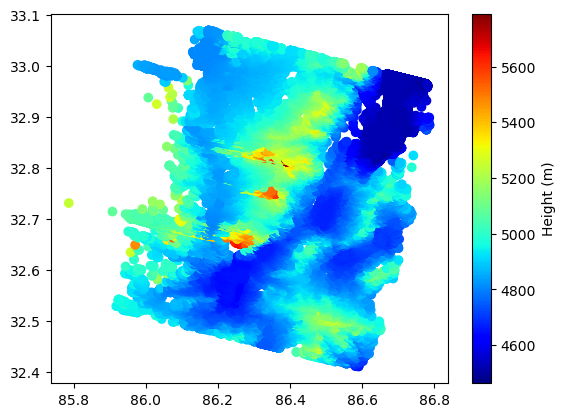

In [10]:
# mask to get good water pixels
mask = np.where(pixc_nc.classification > 2)
plt.scatter(x=pixc_nc.longitude[mask], y=pixc_nc.latitude[mask], c=pixc_nc.height[mask], cmap='jet')
# plt.scatter(x=pixc_nc.longitude, y=pixc_nc.latitude, c=pixc_nc.height, cmap='jet')
# plt.clim((1700,2100))
plt.colorbar().set_label('Height (m)')



#### 2. SWOT_L2_HR_Raster product.

In [11]:
links_list = []
raster_results = earthaccess.search_data(short_name = 'SWOT_L2_HR_Raster_2.0', 
                                    temporal = time_range,
                                    granule_name = '*_100m_*_551_106F*',
                                    # bounding_box = region_dianchi # bounds of the region
                                    # polygon = region_coords       # polygon.exterior.coords of the region
                                    )
for r in range(len(raster_results)):
    lake_link = earthaccess.results.DataGranule.data_links(raster_results[r], access='external')[0]
    links_list.append(lake_link)
links_list = links_list[::2]
print(len(links_list))
# earthaccess.download(links_list, dir_raster)


5


QUEUEING TASKS | :   0%|          | 0/5 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/5 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/5 [00:00<?, ?it/s]

['data/tibet-lake/raster/SWOT_L2_HR_Raster_100m_UTM45S_N_x_x_x_008_551_106F_20240102T230019_20240102T230040_PGC0_02.nc',
 'data/tibet-lake/raster/SWOT_L2_HR_Raster_100m_UTM45S_N_x_x_x_009_551_106F_20240123T194524_20240123T194545_PIC0_01.nc',
 'data/tibet-lake/raster/SWOT_L2_HR_Raster_100m_UTM45S_N_x_x_x_011_551_106F_20240305T131533_20240305T131554_PIC0_01.nc',
 'data/tibet-lake/raster/SWOT_L2_HR_Raster_100m_UTM45S_N_x_x_x_013_551_106F_20240416T064543_20240416T064604_PIC0_01.nc',
 'data/tibet-lake/raster/SWOT_L2_HR_Raster_100m_UTM45S_N_x_x_x_015_551_106F_20240528T001551_20240528T001612_PIC0_01.nc']

In [12]:
## Check original .nc raster file.
paths_file = [os.path.join(dir_raster, file) for file in os.listdir(dir_raster) if 'Raster_100m_' in file and '.nc' in file]
print(paths_file[0])
raster_nc = xr.open_dataset(paths_file[0], decode_times=False)
raster_nc



data/tibet-lake/raster/SWOT_L2_HR_Raster_100m_UTM45S_N_x_x_x_015_551_106F_20240528T001551_20240528T001612_PIC0_01.nc


<xarray.Dataset>
Dimensions:                  (x: 1517, y: 1517)
Coordinates:
  * x                        (x) float64 3.242e+05 3.243e+05 ... 4.758e+05
  * y                        (y) float64 3.523e+06 3.523e+06 ... 3.675e+06
Data variables: (12/39)
    crs                      object ...
    longitude                (y, x) float64 ...
    latitude                 (y, x) float64 ...
    wse                      (y, x) float32 ...
    wse_qual                 (y, x) float32 ...
    wse_qual_bitwise         (y, x) float64 ...
    ...                       ...
    load_tide_fes            (y, x) float32 ...
    load_tide_got            (y, x) float32 ...
    pole_tide                (y, x) float32 ...
    model_dry_tropo_cor      (y, x) float32 ...
    model_wet_tropo_cor      (y, x) float32 ...
    iono_cor_gim_ka          (y, x) float32 ...
Attributes: (12/49)
    Conventions:                   CF-1.7
    title:                         Level 2 KaRIn High Rate Raster Data Product
    source:                        Ka-band radar interferometer
    history:                       2024-06-01T09:46:39Z : Creation
    platform:                      SWOT
    references:                    V1.2.1
    ...                            ...
    x_min:                         324200.0
    x_max:                         475800.0
    y_min:                         3523000.0
    y_max:                         3674600.0
    institution:                   CNES
    product_version:               01

Text(0.5, 1.0, 'sig0')

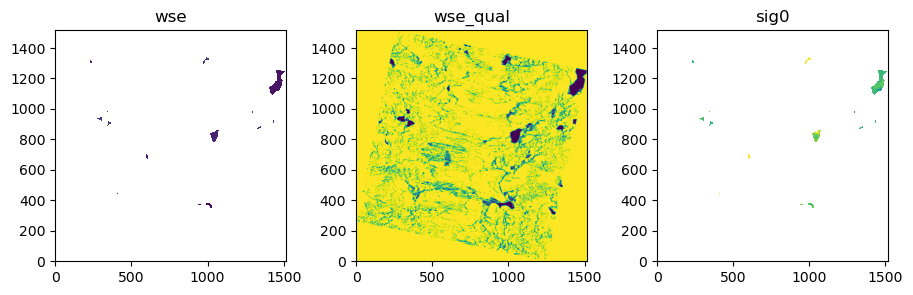

In [13]:
fig, ax = plt.subplots(1,3, figsize=(11, 3))
ax[0].imshow(raster_nc.wse, origin='lower'); ax[0].set_title('wse')
ax[1].imshow(raster_nc.wse_qual, origin='lower'); ax[1].set_title('wse_qual')
ax[2].imshow(raster_nc.sig0, vmin=-100, vmax=100, origin='lower'); ax[2].set_title('sig0')


